In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [13]:
# Load the data
df = pd.read_csv('AAPL.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the Date column
df.sort_values('Date', inplace=True)

# Use the Close price as the feature to predict the next day's Close price
# Shift the Close column by -1 to create the 'Next Day Close' column
df['Next Day Close'] = df['Close'].shift(-1)

# Drop the last row since it will have a NaN value for 'Next Day Close'
df = df[:-1]


In [14]:
# Define the feature and target variables
X = df[['Close']]  # features
y = df['Next Day Close']  # target

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 5.014086314824809


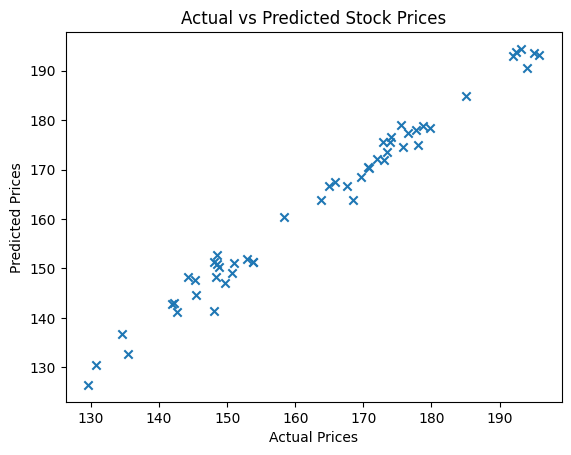

In [17]:
# Predict the 'Next Day Close' for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, marker='x')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Stock Prices")
plt.show()


In [6]:
# To predict the next day's closing price using the latest available closing price
# you should retrain the model on the entire dataset and predict the next value

# Retrain the model on the full dataset
model.fit(X, y)

# Predict the next day's closing price (using the last day's closing price)
# We reshape the input to (-1, 1) because the model expects a 2D array
next_day_close = np.array(df['Close'].iloc[-1]).reshape(-1, 1)
predicted_next_day_close = model.predict(next_day_close)

print(f"Predicted next day's closing price: {predicted_next_day_close[0]}")


Predicted next day's closing price: 174.00502526291285


d:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
